In [ ]:
install.packages("Seurat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leidenbase’, ‘lmtest’, ‘matrixStats’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’




In [ ]:
# ============================================================
# Install required packages (CRAN + Bioconductor)
# ============================================================

# 0) Helper: install CRAN if missing
install_if_missing <- function(pkgs) {
  for (p in pkgs) {
    if (!requireNamespace(p, quietly = TRUE)) {
      install.packages(p, repos = "https://cloud.r-project.org")
    }
  }
}

# 1) CRAN packages
cran_packages <- c(
  "dplyr",
  "ggplot2",
  "pheatmap",
  "patchwork"
)
install_if_missing(cran_packages)

# 2) Bioconductor setup
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager", repos = "https://cloud.r-project.org")
}

# 3) Bioconductor packages
bioc_packages <- c(
  "clusterProfiler",
  "msigdbr"
)
for (p in bioc_packages) {
  if (!requireNamespace(p, quietly = TRUE)) {
    BiocManager::install(p, ask = FALSE, update = TRUE)
  }
}

# 4) Load all required libraries
library(dplyr)
library(ggplot2)
library(clusterProfiler)
library(pheatmap)
library(patchwork)
library(msigdbr)

message("✅ All packages installed and loaded successfully.")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘formatR’, ‘XVector’, ‘GenomeInfoDb’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘plogr’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘fastmatch’, ‘ggplotify’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘BiocParallel’, ‘fgsea’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggtangle’, ‘scatterpie’, ‘ggtree’, ‘R.utils’, ‘AnnotationDbi’, ‘DOSE’, ‘enrichplot’,

In [ ]:
install.packages("anndata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("GSVA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘GSVA’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
# ==============================================================================
# Part 3: Load Data and Prepare for Analysis
# ==============================================================================
print("\n--- Step 3: Loading Data from the local unzipped folder ---")

# Define the path to your .h5ad file within the unzipped folder
# This path should now be correct as it's in the local Colab session
h5ad_file_path <- "/content/SW620.h5ad"

tryCatch({
  # Read the .h5ad file and convert it to a Seurat object
  adata <- anndata::read_h5ad(h5ad_file_path)
  seurat_obj <- CreateSeuratObject(counts = t(adata$X), meta.data = adata$obs)

  print("✅ Data successfully loaded and converted to a Seurat object.")

}, error = function(e) {
  stop(paste("❌ ERROR: Failed to load the .h5ad file. Please check the path. Error:", e$message))
})

[1] "\n--- Step 3: Loading Data from the local unzipped folder ---"


Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


[1] "✅ Data successfully loaded and converted to a Seurat object."


In [ ]:
# 1) Ensure Python deps
if (!requireNamespace("reticulate", quietly = TRUE)) install.packages("reticulate")
library(reticulate)
if (!py_module_available("anndata")) py_install("anndata", pip = TRUE)
if (!py_module_available("pandas"))  py_install("pandas",  pip = TRUE)
if (!py_module_available("numpy"))   py_install("numpy",   pip = TRUE)

# 2) Inspect the AnnData file (prints a concise report)
py_run_string("
import anndata as ad
import numpy as np
import pandas as pd

adata = ad.read_h5ad('SW620.h5ad', backed='r')

print('=== SHAPE ===')
print(f'{adata.n_obs} cells × {adata.n_vars} genes')

print('\\n=== X ===')
print('type:', type(adata.X).__name__)

print('\\n=== LAYERS ===')
print(list(getattr(adata, 'layers', {}).keys()))

print('\\n=== RAW ===')
print('present' if getattr(adata, 'raw', None) is not None else 'absent')

print('\\n=== OBS COLUMNS (metadata) ===')
print(list(adata.obs.columns))

print('\\n=== VAR COLUMNS (gene metadata) ===')
print(list(adata.var.columns))

print('\\n=== UNS KEYS ===')
print(list(adata.uns.keys()))

print('\\n=== FIRST 5 GENE NAMES ===')
try:
    print(list(adata.var_names[:5]))
except Exception as e:
    print('Error reading var_names:', e)

# Heuristics for cluster labels
candidates = ['leiden','louvain','clusters','seurat_clusters','cell_type','celltype','cell_type_annotation']
present = [c for c in candidates if c in adata.obs.columns]
print('\\n=== CLUSTER CANDIDATES FOUND ===')
print(present)
if present:
    for c in present:
        vc = adata.obs[c].astype('category').value_counts().to_dict()
        print(f'{c} levels (n):', vc)

# Where counts might live
counts_sources = []
if 'counts' in getattr(adata, 'layers', {}): counts_sources.append('layers[counts]')
if getattr(adata, 'raw', None) is not None: counts_sources.append('raw.X')
print('\\n=== POSSIBLE COUNTS SOURCES ===')
print(counts_sources)
")


In [ ]:
out <- py_run_string("
import anndata as ad, numpy as np, pandas as pd
adata = ad.read_h5ad('SW620.h5ad', backed='r')

info = {}
info['shape'] = (adata.n_obs, adata.n_vars)
info['layers'] = list(getattr(adata, 'layers', {}).keys())
info['has_raw'] = adata.raw is not None
info['obs_columns'] = list(adata.obs.columns)
info['var_columns'] = list(adata.var.columns)
info['uns_keys'] = list(adata.uns.keys())
info['gene_names_head'] = list(adata.var_names[:5])

# find possible cluster columns
candidates = ['leiden','louvain','clusters','seurat_clusters','cell_type','celltype','cell_type_annotation']
present = [c for c in candidates if c in adata.obs.columns]
info['cluster_candidates'] = present
if present:
    info['cluster_levels'] = {c: adata.obs[c].astype('category').value_counts().to_dict() for c in present}

counts_sources = []
if 'counts' in getattr(adata, 'layers', {}): counts_sources.append('layers[counts]')
if adata.raw is not None: counts_sources.append('raw.X')
info['counts_sources'] = counts_sources

info
")

print(out$info)


$shape
$shape[[1]]
[1] 381

$shape[[2]]
[1] 2000


$layers
list()

$has_raw
[1] FALSE

$obs_columns
[1] "louvain"

$var_columns
[1] "highly_variable"      "highly_variable_rank" "means"               
[4] "variances"            "variances_norm"       "mean"                
[7] "std"                 

$uns_keys
[1] "hvg"            "log1p"          "louvain"        "louvain_colors"
[5] "neighbors"      "pca"            "umap"          

$gene_names_head
[1] "PLEKHN1"  "HES4"     "TNFRSF18" "TNFRSF4"  "TAS1R3"  

$cluster_candidates
[1] "louvain"

$cluster_levels
$cluster_levels$louvain
$cluster_levels$louvain$`0`
[1] 211

$cluster_levels$louvain$`1`
[1] 170



$counts_sources
list()



In [ ]:
# ==============================================================================
# Functional Enrichment on SW620.h5ad (log1p-normalized X; no raw counts)
# ==============================================================================

# --- Packages ---
if (!requireNamespace("pacman", quietly = TRUE)) install.packages("pacman")
pacman::p_load(reticulate, Matrix, dplyr, stats, clusterProfiler, msigdbr, org.Hs.eg.db)

# --- Load AnnData in Python and convert pieces back to R ---
if (!py_module_available("anndata")) py_install("anndata", pip = TRUE)
library(reticulate)

anndata <- import("anndata")
adata <- anndata$read_h5ad("SW620.h5ad")   # load into memory

# Convert to R objects (CRITICAL: use py_to_r)
Xr        <- py_to_r(adata$X)
genes     <- as.character(py_to_r(adata$var_names))
obs_df    <- py_to_r(adata$obs)

# Validate presence of louvain
if (!"louvain" %in% colnames(obs_df)) stop("No 'louvain' column found in adata$obs.")
clusters  <- as.character(obs_df$louvain)

# Make X a regular R matrix
if (inherits(Xr, "dgCMatrix") || inherits(Xr, "dgTMatrix")) {
  X <- as.matrix(Xr)
} else if (is.matrix(Xr)) {
  X <- Xr
} else {
  X <- as.matrix(Xr)
}
stopifnot(ncol(X) == length(genes))
colnames(X) <- genes

# --- Quick sanity checks ---
stopifnot(nrow(X) == length(clusters))
message(sprintf("Data shape: %d cells x %d genes; clusters: %s",
                nrow(X), ncol(X),
                paste(sort(unique(clusters)), collapse = ", ")))
print(table(clusters))

# --- Helper: % detected (log1p scale: >0 implies original count >0) ---
pct_detected <- function(v) mean(v > 0)

# --- Differential expression: Wilcoxon cluster vs rest on log1p(X) ---
find_markers_wilcox <- function(X, clusters, cluster_id, min_pct = 0.25) {
  in_idx  <- clusters == cluster_id
  out_idx <- !in_idx

  pct_in  <- apply(X[in_idx, , drop = FALSE],  2, pct_detected)
  pct_out <- apply(X[out_idx, , drop = FALSE], 2, pct_detected)

  keep <- pct_in >= min_pct
  if (!any(keep)) return(data.frame())

  kept_genes <- colnames(X)[keep]

  # Wilcoxon p-values
  pvals <- sapply(kept_genes, function(g) {
    wilcox.test(X[in_idx, g], X[out_idx, g], exact = FALSE)$p.value
  })

  mean_in  <- colMeans(X[in_idx,  kept_genes, drop = FALSE])
  mean_out <- colMeans(X[out_idx, kept_genes, drop = FALSE])
  logfc    <- mean_in - mean_out

  padj <- p.adjust(pvals, method = "BH")

  dplyr::arrange(
    data.frame(
      gene       = kept_genes,
      cluster    = cluster_id,
      p_val      = as.numeric(pvals),
      p_val_adj  = as.numeric(padj),
      avg_diff   = as.numeric(logfc),
      pct_in     = as.numeric(pct_in[keep]),
      pct_out    = as.numeric(pct_out[keep]),
      stringsAsFactors = FALSE
    ),
    p_val_adj, desc(avg_diff)
  )
}

# Compute markers for all clusters
unique_clusters <- sort(unique(clusters))
marker_list <- lapply(unique_clusters, function(cl) {
  find_markers_wilcox(X, clusters, cl, min_pct = 0.25)
})
markers <- dplyr::bind_rows(marker_list)

# Significance thresholds (match your Seurat-like settings)
sig_markers <- markers %>%
  dplyr::filter(p_val_adj < 0.05, avg_diff > 0.25)

message(sprintf("Significant markers retained: %d", nrow(sig_markers)))

# --- Hallmark gene sets (human) ---
hallmark_gene_sets <- msigdbr(species = "Homo sapiens", category = "H") %>%
  dplyr::select(gs_name, gene_symbol) %>%
  as.data.frame()

# --- Enrichment per cluster ---
clusters_to_analyze <- sort(unique(sig_markers$cluster))
for (cl in clusters_to_analyze) {
  cat(paste0("\n", paste(rep("=", 60), collapse = ""), "\n"))
  cat(sprintf("      ENRICHMENT: Cluster %s (n=%d markers)\n",
              cl, sum(sig_markers$cluster == cl)))
  cat(paste0(paste(rep("=", 60), collapse = ""), "\n"))

  gene_vec <- sig_markers %>%
    dplyr::filter(cluster == cl) %>%
    dplyr::arrange(p_val_adj, desc(avg_diff)) %>%
    dplyr::pull(gene) %>%
    unique()

  if (length(gene_vec) == 0) {
    cat("--> No significant markers for this cluster. Skipping.\n")
    next
  }

  enrich <- try(
    clusterProfiler::enricher(
      gene = gene_vec,
      TERM2GENE = hallmark_gene_sets
    ),
    silent = TRUE
  )

  if (inherits(enrich, "try-error") || is.null(enrich)) {
    cat("Enrichment failed for this cluster.\n")
    next
  }

  df <- as.data.frame(enrich) %>% dplyr::filter(pvalue < 0.05)

  if (nrow(df) == 0) {
    cat(sprintf("--> No pathways with p < 0.05 for Cluster %s.\n", cl))
  } else {
    cat(sprintf("--- Top enriched pathways (p < 0.05) for Cluster %s ---\n", cl))
    print(df[, c("ID", "pvalue", "p.adjust", "geneID")])
  }
}

cat("\n✅ Finished: Wilcoxon markers and Hallmark enrichment per louvain cluster.\n")


Data shape: 381 cells x 2000 genes; clusters: 0, 1



clusters
  0   1 
211 170 


Significant markers retained: 312




      ENRICHMENT: Cluster 0 (n=126 markers)
--- Top enriched pathways (p < 0.05) for Cluster 0 ---
                                                 ID       pvalue     p.adjust
HALLMARK_E2F_TARGETS           HALLMARK_E2F_TARGETS 8.562712e-06 0.0003510712
HALLMARK_G2M_CHECKPOINT     HALLMARK_G2M_CHECKPOINT 4.459363e-05 0.0009141693
HALLMARK_MTORC1_SIGNALING HALLMARK_MTORC1_SIGNALING 8.927735e-04 0.0091509281
HALLMARK_MYC_TARGETS_V1     HALLMARK_MYC_TARGETS_V1 8.927735e-04 0.0091509281
HALLMARK_MYC_TARGETS_V2     HALLMARK_MYC_TARGETS_V2 1.877335e-03 0.0153941488
                                                                                         geneID
HALLMARK_E2F_TARGETS      MCM6/PCNA/UNG/MCM5/MCM4/SLBP/DUT/HMGA1/NOLC1/PSMC3IP/ATAD2/SMC3/BRCA1
HALLMARK_G2M_CHECKPOINT       MCM6/MCM5/CDC6/GINS2/CHAF1A/HMGA1/NOLC1/FBXO5/NCL/CDC45/EXO1/E2F1
HALLMARK_MTORC1_SIGNALING          UNG/MCM4/CYB5B/HSPD1/HSPA5/SLC2A1/PRDX1/SLC1A5/DHCR24/ELOVL6
HALLMARK_MYC_TARGETS_V1                    MCM6/

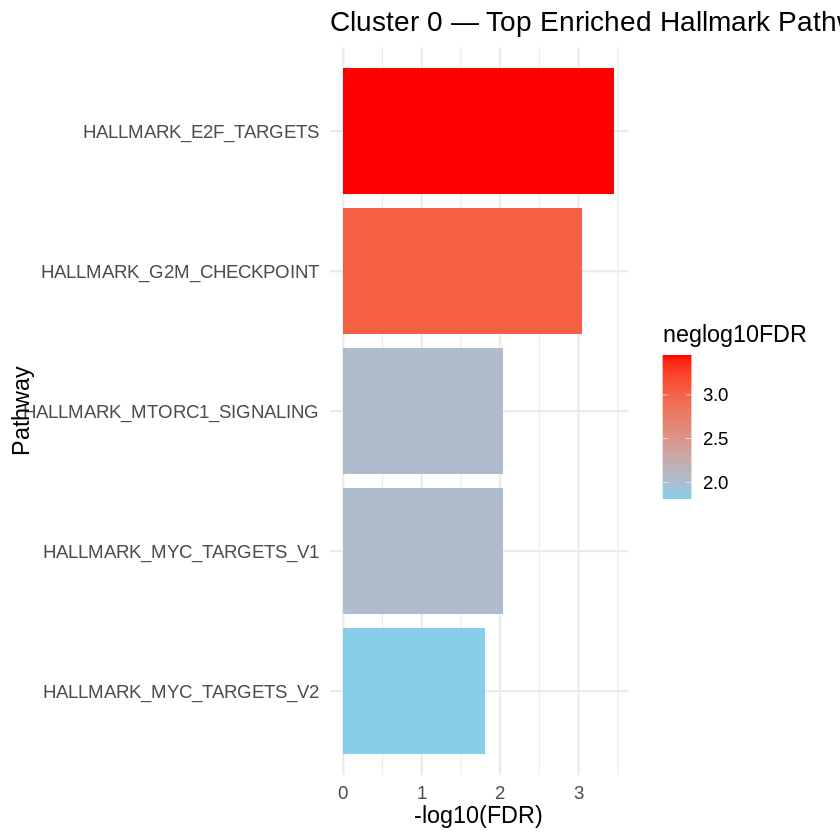

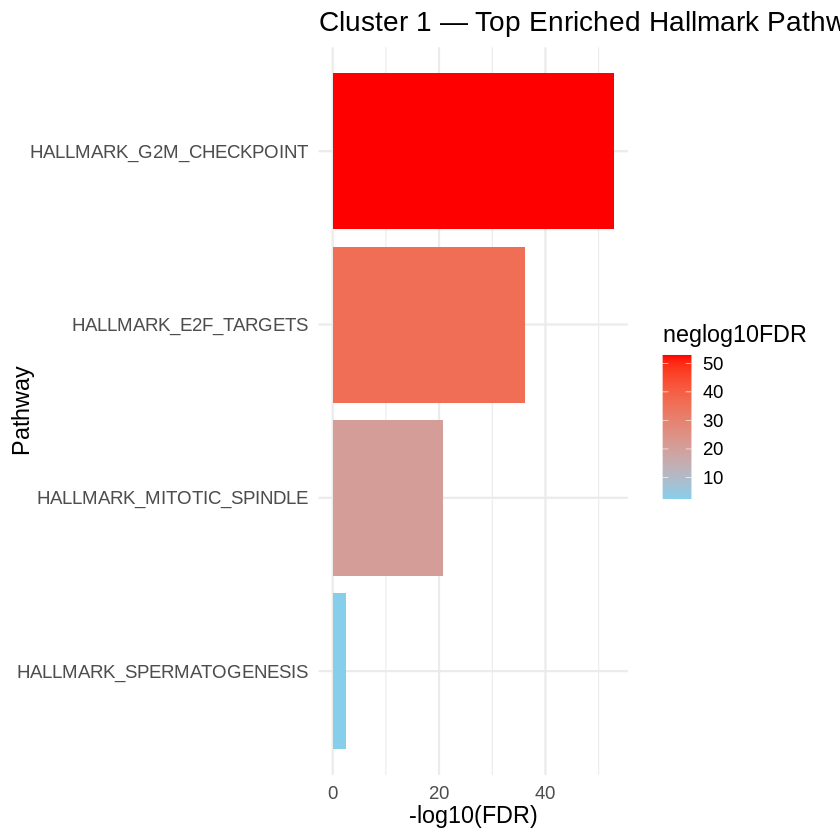

In [ ]:
suppressPackageStartupMessages({
  library(dplyr)
  library(clusterProfiler)
  library(ggplot2)
})

# --- prerequisites ---
if (!exists("sig_markers")) stop("sig_markers not found. Re-run the marker script.")
if (!exists("hallmark_gene_sets")) {
  library(msigdbr)
  hallmark_gene_sets <- msigdbr(species = "Homo sapiens", category = "H") %>%
    dplyr::select(gs_name, gene_symbol) %>%
    as.data.frame()
}

# --- (re)compute enrichments per cluster ---
clusters <- sort(unique(sig_markers$cluster))
enrich_list <- list()
for (cl in clusters) {
  genes_cl <- sig_markers %>%
    filter(cluster == cl) %>%
    arrange(p_val_adj, desc(avg_diff)) %>%
    pull(gene) %>%
    unique()
  if (length(genes_cl) == 0) next
  enr <- suppressWarnings(
    try(enricher(gene = genes_cl, TERM2GENE = hallmark_gene_sets), silent = TRUE)
  )
  if (!inherits(enr, "try-error") && !is.null(enr)) enrich_list[[as.character(cl)]] <- enr
}

# assign enrich0/enrich1 if present
if ("0" %in% names(enrich_list)) enrich0 <- enrich_list[["0"]]
if ("1" %in% names(enrich_list)) enrich1 <- enrich_list[["1"]]

# make df0/df1 (filtered to p < 0.05)
df0 <- if (exists("enrich0")) as.data.frame(enrich0) %>% filter(pvalue < 0.05) else NULL
df1 <- if (exists("enrich1")) as.data.frame(enrich1) %>% filter(pvalue < 0.05) else NULL

# --- your plotting function (unchanged) ---
plot_enrichment_bar <- function(df, cluster_id, top_n = 10) {
  df <- df %>%
    dplyr::arrange(p.adjust) %>%
    head(top_n) %>%
    dplyr::mutate(
      ID = factor(ID, levels = rev(ID)),
      neglog10FDR = -log10(p.adjust)
    )
  ggplot(df, aes(x = ID, y = neglog10FDR, fill = neglog10FDR)) +
    geom_col() +
    coord_flip() +
    scale_fill_gradient(low = "skyblue", high = "red") +
    labs(
      title = paste("Cluster", cluster_id, "— Top Enriched Hallmark Pathways"),
      x = "Pathway", y = "-log10(FDR)"
    ) +
    theme_minimal(base_size = 14)
}

# --- plot (will skip if a cluster had no significant terms) ---
if (!is.null(df0) && nrow(df0) > 0) {
  p0 <- plot_enrichment_bar(df0, cluster_id = 0); print(p0)
} else message("No significant pathways for Cluster 0 (p < 0.05).")

if (!is.null(df1) && nrow(df1) > 0) {
  p1 <- plot_enrichment_bar(df1, cluster_id = 1); print(p1)
} else message("No significant pathways for Cluster 1 (p < 0.05).")

# --- save PNGs (if plots exist) ---
dir.create("enrichment_figures", showWarnings = FALSE)
if (exists("p0")) ggsave("enrichment_figures/barplot_cluster0.png", p0, width = 7, height = 5, dpi = 300)
if (exists("p1")) ggsave("enrichment_figures/barplot_cluster1.png", p1, width = 7, height = 5, dpi = 300)


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 0 — Hallmark enrichment' in 'mbcsToSbcs': - substituted for — (U+2014)”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 1 — Hallmark enrichment' in 'mbcsToSbcs': - substituted for — (U+2014)”


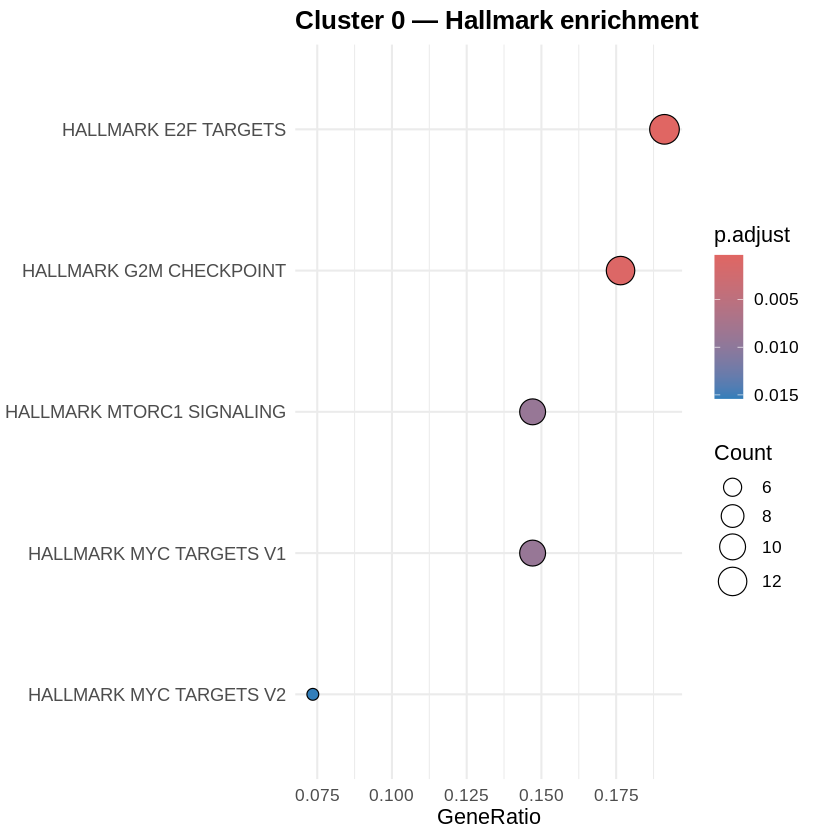

✅ Dotplots saved in enrichment_figures/.



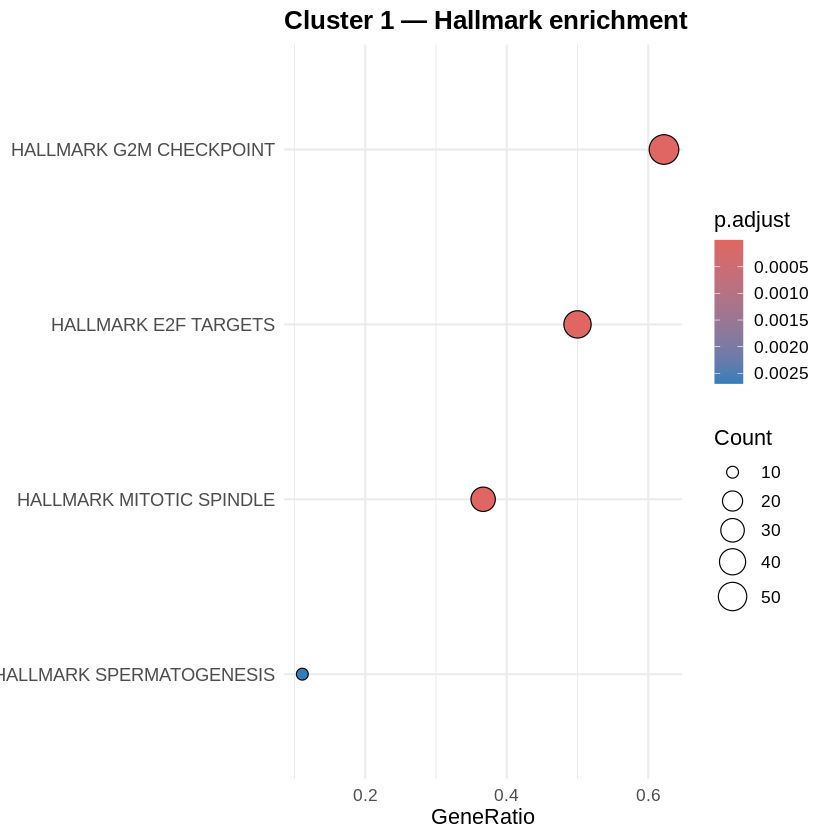

In [ ]:
# ========================= Rebuild enrich0 / enrich1 and dotplot =========================
suppressPackageStartupMessages({
  library(dplyr)
  library(clusterProfiler)
  library(ggplot2)
})

# --- prerequisites: sig_markers and hallmark_gene_sets
if (!exists("sig_markers")) stop("sig_markers not found. Re-run the marker script to create it.")
if (!exists("hallmark_gene_sets")) {
  suppressPackageStartupMessages(library(msigdbr))
  hallmark_gene_sets <- msigdbr(species = "Homo sapiens", category = "H") %>%
    dplyr::select(gs_name, gene_symbol) %>%
    as.data.frame()
}

# --- compute enrichment per cluster (from sig_markers)
clusters <- sort(unique(sig_markers$cluster))
enrich_list <- list()
for (cl in clusters) {
  genes_cl <- sig_markers %>%
    filter(cluster == cl) %>%
    arrange(p_val_adj, desc(avg_diff)) %>%
    pull(gene) %>%
    unique()
  if (length(genes_cl) == 0) next
  enr <- suppressWarnings(try(
    clusterProfiler::enricher(gene = genes_cl, TERM2GENE = hallmark_gene_sets),
    silent = TRUE
  ))
  if (!inherits(enr, "try-error") && !is.null(enr)) {
    enrich_list[[as.character(cl)]] <- enr
  }
}

# --- assign enrich0 / enrich1 if those clusters exist
if ("0" %in% names(enrich_list)) enrich0 <- enrich_list[["0"]]
if ("1" %in% names(enrich_list)) enrich1 <- enrich_list[["1"]]

if (!exists("enrich0") && !exists("enrich1"))
  stop("No enrichResult objects were produced. Check sig_markers content.")

# --- plotting (clusterProfiler::dotplot) and saving
dir.create("enrichment_figures", showWarnings = FALSE)

make_dot <- function(enr, title, file_stub) {
  if (is.null(enr) || nrow(as.data.frame(enr)) == 0) {
    message("No enrichment rows for: ", title); return(invisible(NULL))
  }
  p <- dotplot(enr, showCategory = 10, title = title) +
    theme_minimal(base_size = 13) +
    theme(axis.text.y = element_text(size = 11),
          plot.title = element_text(face = "bold", hjust = 0))
  print(p)
  ggsave(file.path("enrichment_figures", paste0(file_stub, ".png")), p,
         width = 7, height = 5, dpi = 300)
  ggsave(file.path("enrichment_figures", paste0(file_stub, ".pdf")), p,
         width = 7, height = 5)
}

if (exists("enrich0")) make_dot(enrich0, "Cluster 0 — Hallmark enrichment", "dotplot_cluster0")
if (exists("enrich1")) make_dot(enrich1, "Cluster 1 — Hallmark enrichment", "dotplot_cluster1")

message("✅ Dotplots saved in enrichment_figures/.")


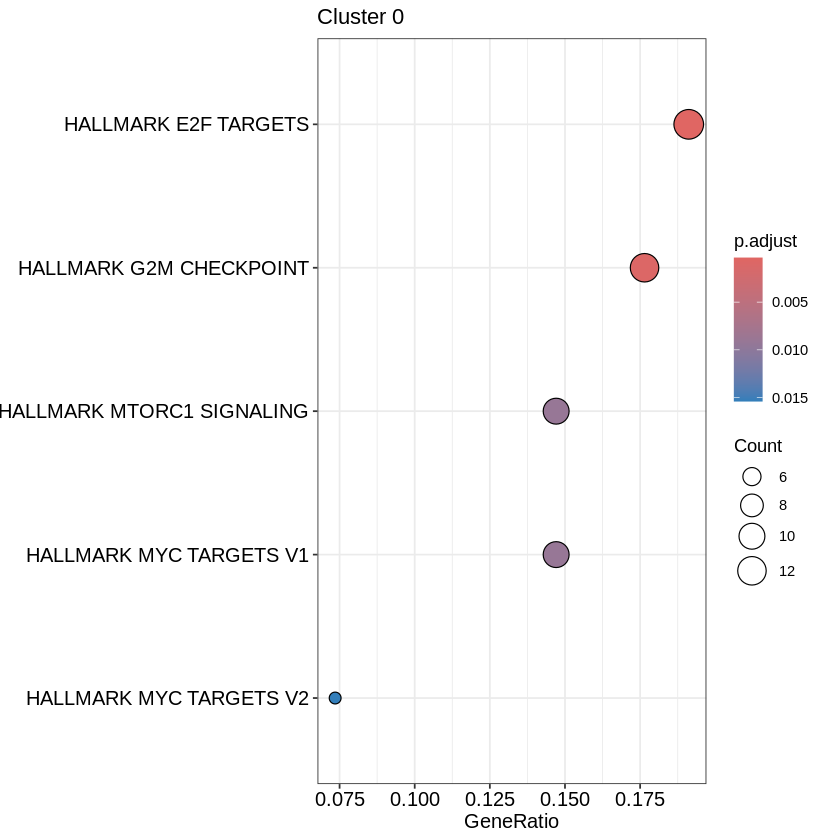

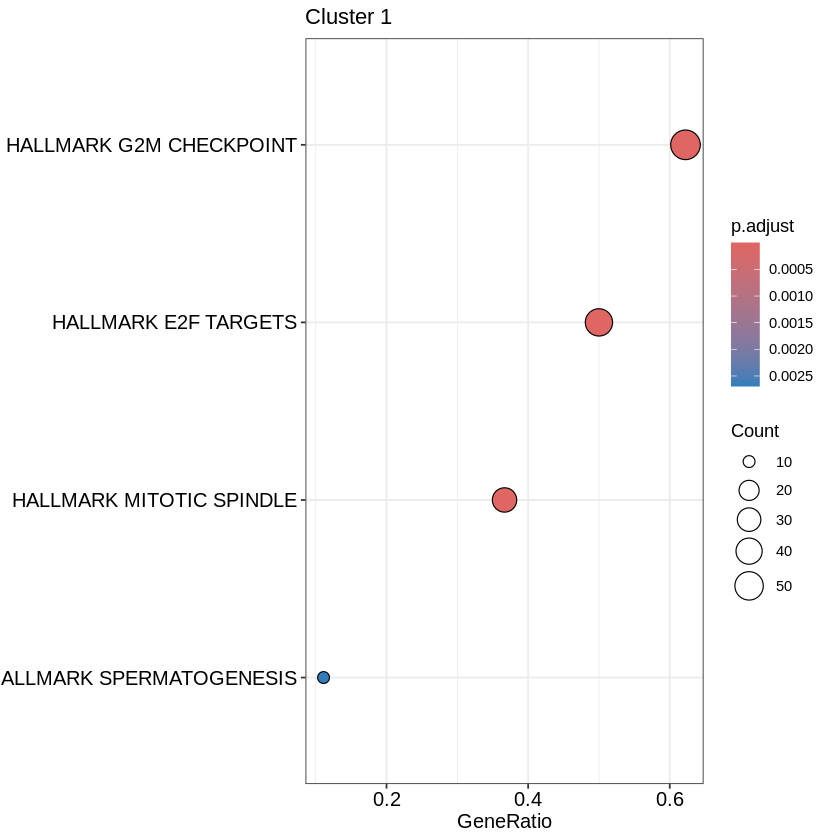

In [ ]:
library(clusterProfiler)
dotplot(enrich0, showCategory = 10, title = "Cluster 0") + theme(axis.text.y = element_text(size = 12))
dotplot(enrich1, showCategory = 10, title = "Cluster 1") + theme(axis.text.y = element_text(size = 12))


In [ ]:
install.packages("pheatmap")
install.packages("patchwork")   # nice for arranging multiple ggplots

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 0 — Top Hallmark Pathways' in 'mbcsToSbcs': - substituted for — (U+2014)”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 0 — Enrichment Dotplot' in 'mbcsToSbcs': - substituted for — (U+2014)”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 1 — Top Hallmark Pathways' in 'mbcsToSbcs': - substituted for — (U+2014)”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'Cluster 1 — Enrichment Dotplot' in 'mbcsToSbcs': - substituted for — (U+2014)”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for '-log10(FDR) • Hallmark enrichment' in 'mbcsToSbcs': . substituted for • (U+2022)”


png 
  3

✅ Plots saved in folder: enrichment_figures/



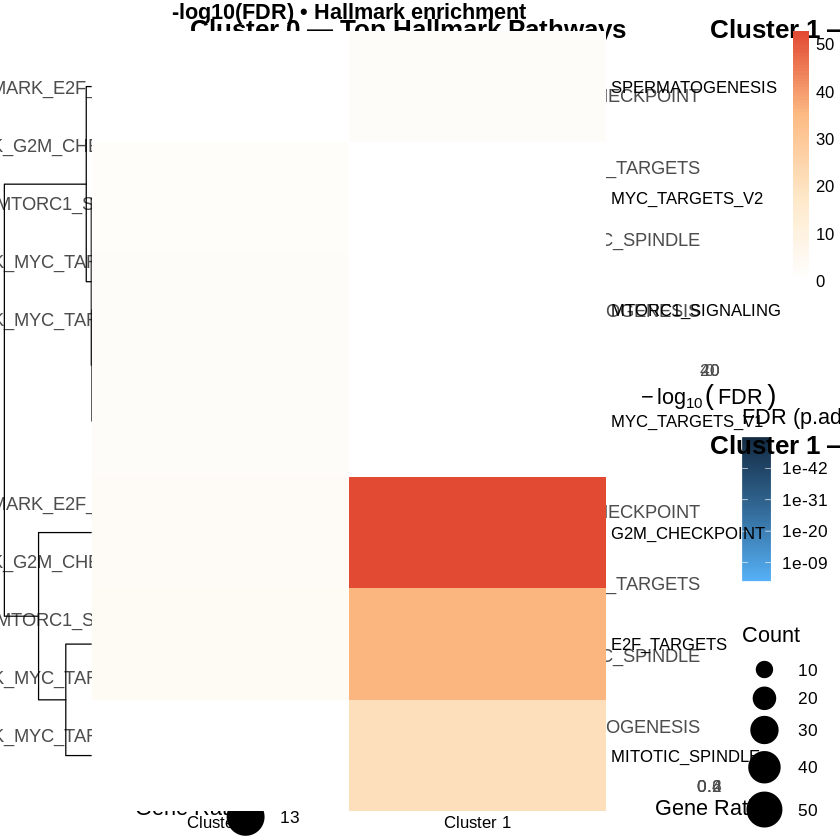

In [ ]:
# ============================================================
# Visualizing Hallmark enrichment (recompute enrichments, plot)
# ============================================================

# 0) Packages
suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(clusterProfiler)
  library(pheatmap)
  library(patchwork)
})

# 1) Recompute enrichment per cluster from sig_markers
#    (sig_markers must have columns: gene, cluster, p_val_adj, avg_diff)
if (!exists("sig_markers")) stop("sig_markers not found. Re-run the marker/enrichment prep script.")
if (!exists("hallmark_gene_sets")) stop("hallmark_gene_sets not found. Recreate with msigdbr(species='Homo sapiens', category='H').")

clusters <- sort(unique(sig_markers$cluster))
enrich_list <- list()
df_list <- list()

for (cl in clusters) {
  gene_vec <- sig_markers %>%
    filter(cluster == cl) %>%
    arrange(p_val_adj, desc(avg_diff)) %>%
    pull(gene) %>%
    unique()

  if (length(gene_vec) == 0) next

  enr <- suppressWarnings(
    try(clusterProfiler::enricher(gene = gene_vec, TERM2GENE = hallmark_gene_sets), silent = TRUE)
  )
  if (inherits(enr, "try-error") || is.null(enr)) next

  # keep both the enrichResult and a filtered df (p < 0.05)
  enrich_list[[as.character(cl)]] <- enr
  dff <- as.data.frame(enr) %>% mutate(cluster = cl)
  df_list[[as.character(cl)]] <- dff
}

# Combine as one df for convenience
enrich_df <- bind_rows(df_list)
if (nrow(enrich_df) == 0) stop("No enrichment results were produced (empty enrich_df).")

# 2) Helper: clean up for plotting
prep_bar_df <- function(df, top_n = 10) {
  df %>%
    arrange(p.adjust) %>%
    slice_head(n = top_n) %>%
    mutate(neglog10FDR = -log10(p.adjust),
           ID = factor(ID, levels = rev(ID)))
}

# Dotplot-like data builder (works on df directly)
prep_dot_df <- function(df, top_n = 10) {
  df <- df %>%
    arrange(p.adjust) %>%
    slice_head(n = top_n) %>%
    mutate(
      Count = if ("Count" %in% names(df)) Count else sapply(strsplit(geneID, "/"), length),
      GeneRatio = if ("GeneRatio" %in% names(df)) {
        # clusterProfiler may store GeneRatio as "a/b"
        sapply(strsplit(as.character(df$GeneRatio), "/"), function(x) as.numeric(x[1]) / as.numeric(x[2]))
      } else {
        # Fallback: Count / length of input gene list (approx)
        # This is only used for visualization scaling
        pmax(Count / max(Count), 1e-6)
      }
    )
  df$ID <- factor(df$ID, levels = rev(df$ID))
  df
}

# 3) Plot functions (barplot + dotplot)
plot_enrichment_bar_df <- function(df, cluster_id, top_n = 10) {
  df2 <- prep_bar_df(df, top_n)
  ggplot(df2, aes(x = ID, y = neglog10FDR, fill = neglog10FDR)) +
    geom_col(width = 0.7) +
    coord_flip() +
    labs(
      title = paste0("Cluster ", cluster_id, " — Top Hallmark Pathways"),
      x = NULL, y = expression(-log[10]("FDR"))
    ) +
    scale_fill_gradient(low = "#b3d9ff", high = "#d73027") +
    theme_minimal(base_size = 13) +
    theme(
      legend.position = "none",
      axis.text.y = element_text(size = 11),
      plot.title = element_text(face = "bold", hjust = 0)
    )
}

plot_enrichment_dot_df <- function(df, cluster_id, top_n = 10) {
  df2 <- prep_dot_df(df, top_n)
  ggplot(df2, aes(x = GeneRatio, y = ID, size = Count, color = p.adjust)) +
    geom_point() +
    scale_color_continuous(trans = "log10", name = "FDR (p.adjust)",
                           guide = guide_colorbar(reverse = TRUE)) +
    scale_size_area(max_size = 10) +
    labs(
      title = paste0("Cluster ", cluster_id, " — Enrichment Dotplot"),
      x = "Gene Ratio", y = NULL
    ) +
    theme_minimal(base_size = 13) +
    theme(
      plot.title = element_text(face = "bold", hjust = 0),
      axis.text.y = element_text(size = 11)
    )
}

# 4) Make the cluster-specific plots
plots_bar <- list()
plots_dot <- list()

for (cl in clusters) {
  dff <- df_list[[as.character(cl)]]
  if (is.null(dff)) next
  dff_sig <- dff %>% filter(pvalue < 0.05)
  if (nrow(dff_sig) == 0) next

  plots_bar[[as.character(cl)]] <- plot_enrichment_bar_df(dff_sig, cl, top_n = 10)
  plots_dot[[as.character(cl)]] <- plot_enrichment_dot_df(dff_sig, cl, top_n = 10)
}

# 5) Heatmap across clusters: -log10(FDR) for union of top terms (p < 0.05)
heat_top_n <- 15
top_terms_by_cluster <- lapply(df_list, function(d) {
  d %>% arrange(p.adjust) %>% filter(pvalue < 0.05) %>% slice_head(n = heat_top_n) %>% pull(ID)
})
all_paths <- unique(unlist(top_terms_by_cluster))
if (length(all_paths) > 0) {
  mat <- sapply(clusters, function(cl) {
    d <- df_list[[as.character(cl)]]
    vals <- -log10(d$p.adjust[match(all_paths, d$ID)])
    vals[is.na(vals)] <- 0
    vals
  })
  colnames(mat) <- paste0("Cluster ", clusters)
  rownames(mat) <- gsub("^HALLMARK_", "", all_paths)

  # nicer color palette
  pal <- colorRampPalette(c("#ffffff", "#fee8c8", "#fdbb84", "#e34a33"))(80)

  hm <- pheatmap(mat,
                 cluster_rows = TRUE,
                 cluster_cols = FALSE,
                 color = pal,
                 main = "-log10(FDR) • Hallmark enrichment",
                 angle_col = 0,
                 border_color = NA,
                 silent = TRUE)
} else {
  hm <- NULL
  warning("No pathways passed p < 0.05 for heatmap union.")
}

# 6) Show side-by-side panels (bar over dot)
#    Only plot for clusters that produced results
plotted_clusters <- intersect(names(plots_bar), names(plots_dot))
if (length(plotted_clusters) > 0) {
  wrap_plot <- NULL
  for (cl in plotted_clusters) {
    pane <- (plots_bar[[cl]] / plots_dot[[cl]])
    wrap_plot <- if (is.null(wrap_plot)) pane else (wrap_plot | pane)
  }
  print(wrap_plot)
}
if (!is.null(hm)) print(hm)

# 7) Save to files (PNG + PDF)
dir.create("enrichment_figures", showWarnings = FALSE)
# panels
if (length(plotted_clusters) > 0) {
  ggsave("enrichment_figures/Clusters_bar_dot.png", wrap_plot, width = 14, height = 7, dpi = 300)
  ggsave("enrichment_figures/Clusters_bar_dot.pdf", wrap_plot, width = 14, height = 7)
}
# heatmap
if (!is.null(hm)) {
  # pheatmap returns a grid object; use png/pdf devices to save
  png("enrichment_figures/Enrichment_heatmap.png", width = 1400, height = 1200, res = 180)
  pheatmap(mat,
           cluster_rows = TRUE, cluster_cols = FALSE,
           color = pal, main = "-log10(FDR) • Hallmark enrichment",
           angle_col = 0, border_color = NA)
  dev.off()
  pdf("enrichment_figures/Enrichment_heatmap.pdf", width = 9, height = 10)
  pheatmap(mat,
           cluster_rows = TRUE, cluster_cols = FALSE,
           color = pal, main = "-log10(FDR) • Hallmark enrichment",
           angle_col = 0, border_color = NA)
  dev.off()
}

message("✅ Plots saved in folder: enrichment_figures/")
